In [3]:
import pandas as pd

df = pd.read_csv('results.csv')
df.head()

,min,max,repetitions,result
0,-1000,-1000,10,100.0
1,-1000,-1000,60,100.0
2,-1000,-1000,110,100.0
3,-1000,-1000,160,100.0
4,-1000,-1000,210,100.0


## Analyse de l'impact des variables

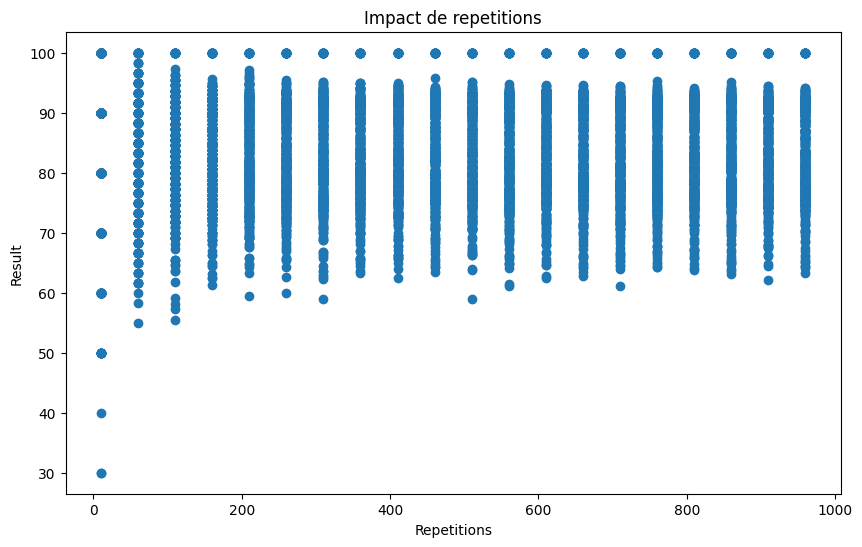

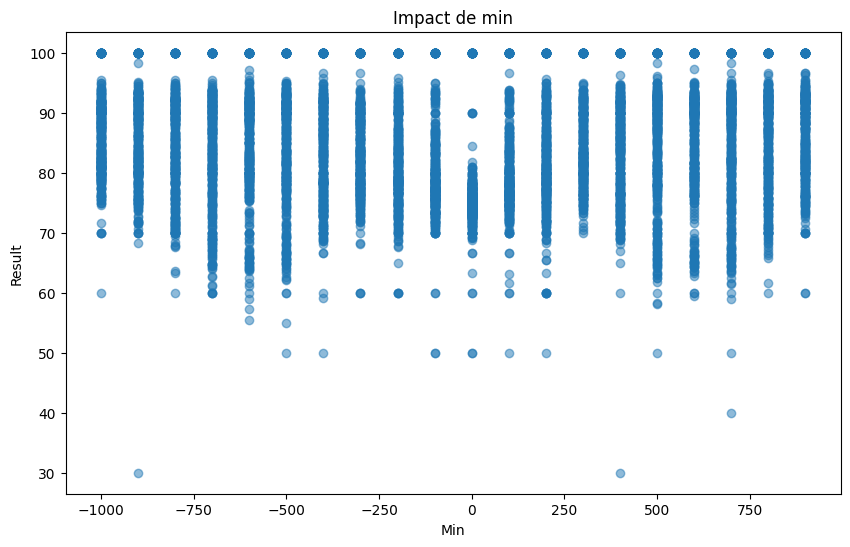

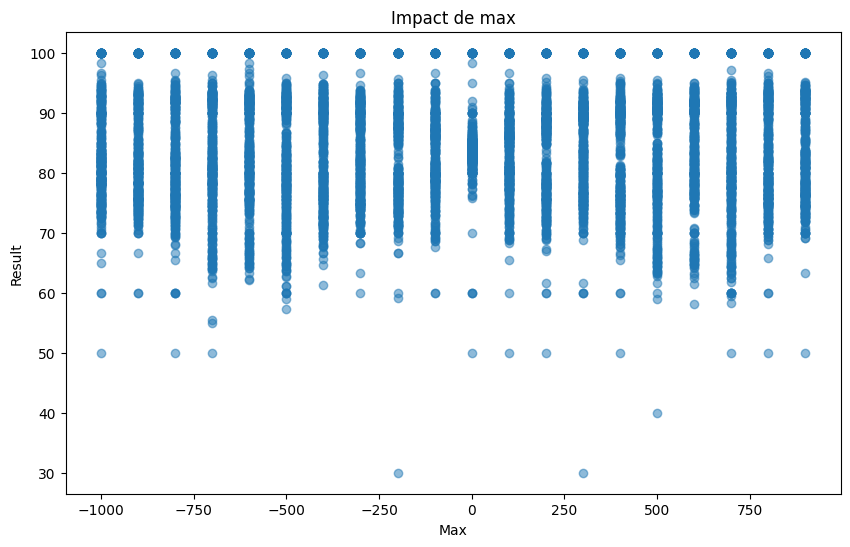

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['repetitions'], df['result'], 'o')
plt.xlabel('Repetitions')
plt.ylabel('Result')
plt.title('Impact de repetitions')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['min'], df['result'], alpha=0.5)
plt.xlabel('Min')
plt.ylabel('Result')
plt.title('Impact de min')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['max'], df['result'], alpha=0.5)
plt.xlabel('Max')
plt.ylabel('Result')
plt.title('Impact de max')
plt.show()


Ces trois graphiques permettent d'analyser l'impact des différents facteurs sur la précision des et la stabilité des résultats. 

- Le nombre de répétitions a un impact non significatif sur la précision des résultats. Cependant on note que des valeurs croissantes de répétitions impliquent une meilleure stabilité des résultats. 
- Pour 'min' l'impact est réel puisqu'on obtient une nette baisse de la précision lorsqu'il est proche de 0. De plus, plus la valeur est éloignée de 0, plus les résultats sont dispersés.
- Pour 'max', les résultats sont aussi plus variés à mesure que l'on s'éloigne de 0.

Pour conclure, de manière générale on remarque que les valeurs extrêmes (faibles et hautes pour 'min' et 'max', faibles pour 'repetitions') introduisent plus de variabilité. De plus plus la précision des résultats baisse drastiquement pour 'min' qui vaut 0.

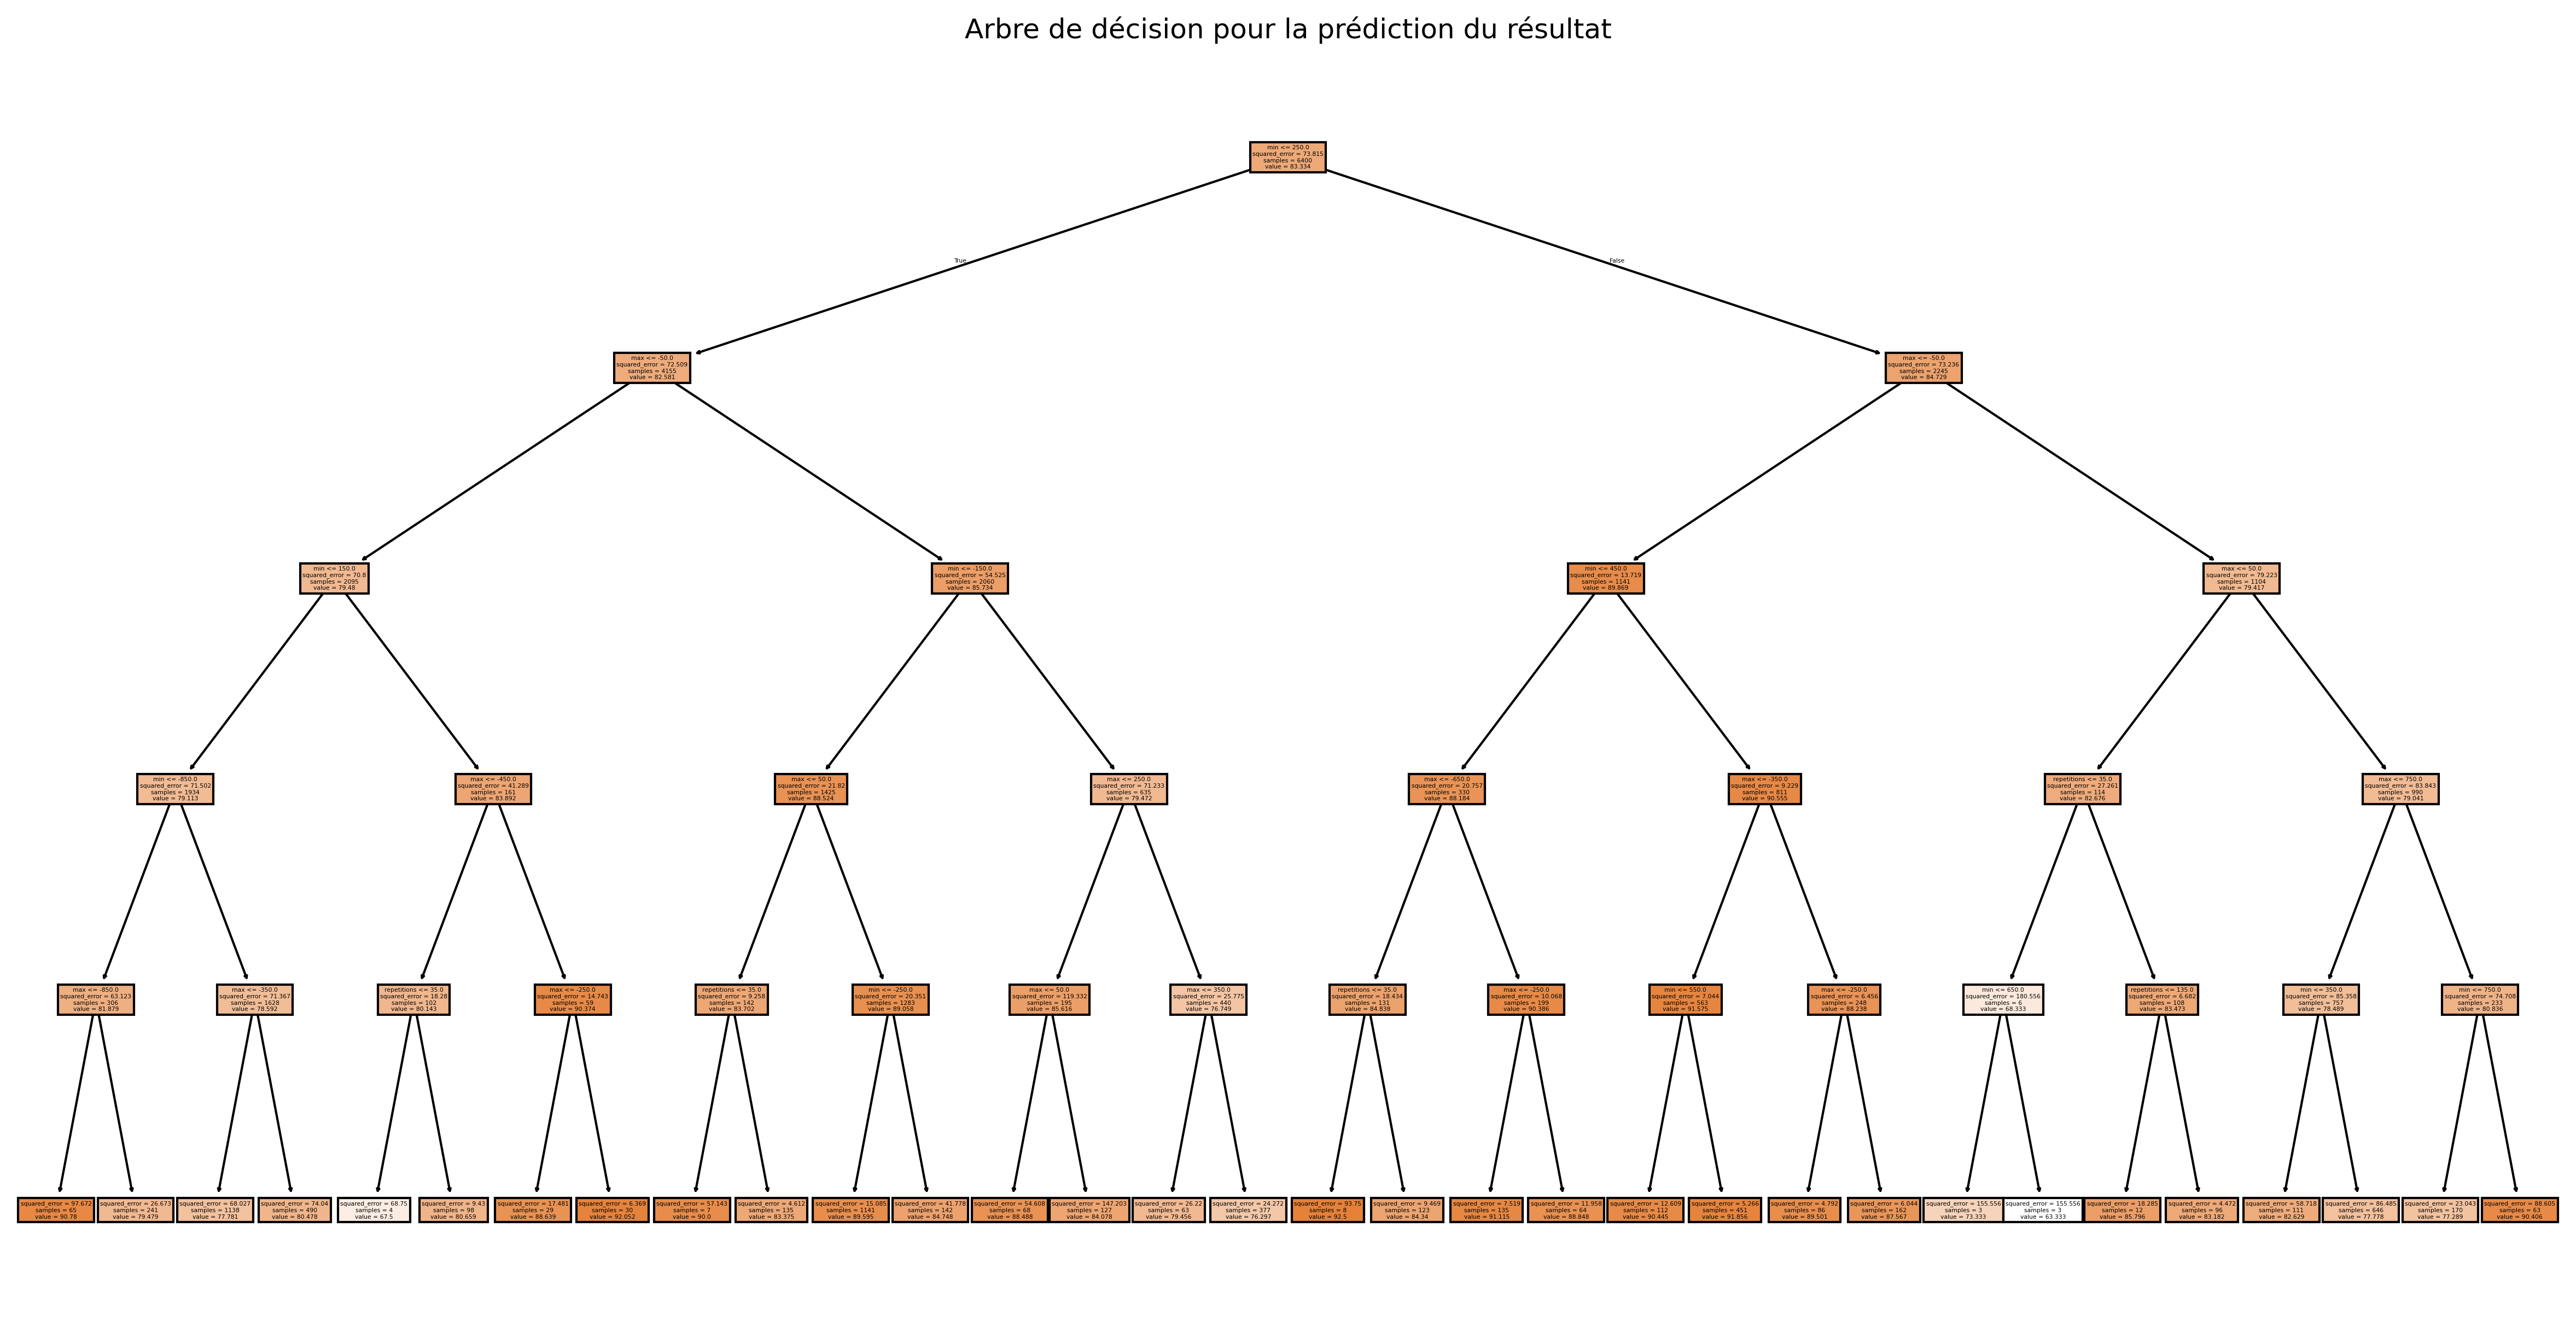

Importance de min : 0.311507532980699
Importance de max : 0.674625999099918
Importance de repetitions : 0.013866467919382945


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = df[['min', 'max', 'repetitions']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5, random_state=42)

model.fit(X_train, y_train)

plt.figure(figsize=(20, 10), dpi=300)
tree.plot_tree(model, feature_names=['min', 'max', 'repetitions'], filled=True)
plt.title('Arbre de décision pour la prédiction du résultat')
plt.show()

importances = model.feature_importances_
features = ['min', 'max', 'repetitions']
for feature, importance in zip(features, importances):
    print(f'Importance de {feature} : {importance}')

L'arbre de décision confirme les conclusions précédentes. On remarque que l'importance du nombre de répétitions dans les résultats est très faible voir nulle. De plus l'arbre donne une plus grande importance à max qu'à min, ce qu'on n'avait pas forcément vu visuellement.